# Coding project - Picture enhancement

To enhance the image, I first removed noise by using the opening function of the skimage.morphology module. I apply that on every channel of the image after converting it to an hsv image. I did it with a disk of value 1.
Then, I equalized the image to get an image that uses the full dynamic range and therefore has a better contrast.
Afterwards, I used a technique called histogram matching, it matches the pixels of the image to the histogram of another image (called reference). I did it because I found that it could enhance the colors of the image.

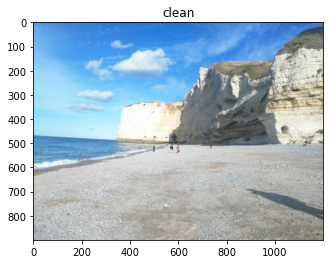

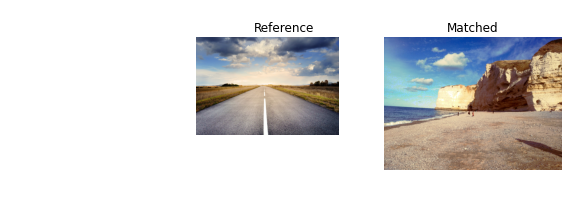

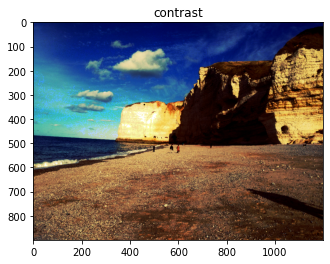

In [66]:
# -- Your code here -- #
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread,imshow,imsave
from skimage.filters import gaussian
from skimage.morphology import  disk
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
%matplotlib inline
from matplotlib import cm
import skimage.filters.rank as skr
from skimage.morphology import disk, opening, closing
from skimage.util.dtype import convert
from skimage import exposure
from skimage.exposure import match_histograms
from skimage.color import rgb2hsv, hsv2rgb
import colorsys
from matplotlib.colors import hsv_to_rgb
im = imread('etretat.jpg')


# noise removal
se = disk(1)
hsv = rgb2hsv(im)
clean0 = opening(im[:,:,0],se)
clean1 = opening(im[:,:,1],se)
clean2 = opening(im[:,:,2],se)
clean= np.dstack((clean0, clean1, clean2))
plt.imshow(clean);
plt.title('clean')
plt.show()

reference = imread('road.jpg')
matched = match_histograms(clean, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

#equalization : want to flatten the peaks of the histogram -> contrast stronger
#because large part that have similar values
#cumulative hist : small range of value will be mapped in a large range of output

def cumul_hist(im):
    cumul_hist = np.zeros(256)
    c = 0
    for v in range(256):
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist

h = cumul_hist(clean)
lut = (h*255).astype('uint8')

contrast = lut[matched.astype('uint8')]


plt.imshow(contrast)
plt.title('contrast')
plt.show()


imsave('enh.jpg', contrast)




